<a href="https://colab.research.google.com/github/schumbar/SJSU_CMPE255/blob/main/assignment_07/b_UMAP_t_sne.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# CMPE 255: Assignment 07 - Part B
## Dimensionality Reduction - UMAP and t-sne

### Assignment Instructions
Write a colab file to illustrate how dimensionality reduction technique like umap can be used followed by clustering, as well as a classification feature extraction technique.

Hints:
1. [Using UMAP for Clustering](https://umap-learn.readthedocs.io/en/latest/clustering.html)
2. [UMAP as a Feature Extraction Technique for Classification](https://umap-learn.readthedocs.io/en/latest/auto_examples/plot_feature_extraction_classification.html)

Dataset Source:

[Wine Dataset for Clustering](https://www.kaggle.com/datasets/harrywang/wine-dataset-for-clustering)

ChatGPT-4 Diabetes Generated Dataset

Sources Used:
1. All provided Hints
2. ChatGPT


In [1]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


### Setup

In [2]:
!pip install matplotlib
!pip install seaborn

In [3]:
!pip install umap
!pip install umap-learn[plot]

  Preparing metadata (setup.py) ... done
  Created wheel for umap: filename=umap-0.1.1-py3-none-any.whl size=3543 sha256=c27202a6ec60ed1b0abb45c3e30183b367425fbfb80361a1464182a6071ec7a9
  Stored in directory: /root/.cache/pip/wheels/15/f1/28/53dcf7a309118ed35d810a5f9cb995217800f3f269ab5771cb
Successfully built umap
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 90.9/90.9 kB 920.7 kB/s eta 0:00:00
  Preparing metadata (setup.py) ... done
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 55.8/55.8 kB 3.8 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 18.3/18.3 MB 53.0 MB/s eta 0:00:00
  Created wheel for umap-learn: filename=umap_learn-0.5.5-py3-none-any.whl size=86832 sha256=2dd07d3b70f76365160e6abe48fe0dda4401c675b813e8ef2840ebe531ef6036
  Stored in directory: /root/.cache/pip/wheels/3a/70/07/428d2b58660a1a3b431db59b806a10da736612ebbc66c1bcc5
Successfully built umap-learn


In [4]:
# Importing necessary libraries
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
import umap
import umap.plot
from sklearn.cluster import KMeans
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import classification_report, confusion_matrix
import numpy as np

# Imports
# from sklearn.decomposition import PCA
# from sklearn.manifold import TSNE
# from sklearn.discriminant_analysis import LinearDiscriminantAnalysis as LDA
# import plotly.express as px


pd.plotting.register_matplotlib_converters()
%matplotlib inline
sns.set(style='darkgrid', font_scale=1.4)

/usr/local/lib/python3.10/dist-packages/umap/plot.py:203: NumbaDeprecationWarning: The keyword argument 'nopython=False' was supplied. From Numba 0.59.0 the default is being changed to True and use of 'nopython=False' will raise a warning as the argument will have no effect. See https://numba.readthedocs.io/en/stable/reference/deprecation.html#deprecation-of-object-mode-fall-back-behaviour-when-using-jit for details.
  @numba.jit(nopython=False)


### Loading Dataset

In [5]:
dataset_file_path = '/content/drive/MyDrive/Colab Notebooks/CMPE255/assignment_07/Datasets/wine-clustering.csv'
# Load the dataset
data = pd.read_csv(dataset_file_path)

### EDA

In [6]:
# Displaying descriptive statistics
print(data.describe())

          Alcohol  Malic_Acid         Ash  Ash_Alcanity   Magnesium  \
count  178.000000  178.000000  178.000000    178.000000  178.000000   
mean    13.000618    2.336348    2.366517     19.494944   99.741573   
std      0.811827    1.117146    0.274344      3.339564   14.282484   
min     11.030000    0.740000    1.360000     10.600000   70.000000   
25%     12.362500    1.602500    2.210000     17.200000   88.000000   
50%     13.050000    1.865000    2.360000     19.500000   98.000000   
75%     13.677500    3.082500    2.557500     21.500000  107.000000   
max     14.830000    5.800000    3.230000     30.000000  162.000000   

       Total_Phenols  Flavanoids  Nonflavanoid_Phenols  Proanthocyanins  \
count     178.000000  178.000000            178.000000       178.000000   
mean        2.295112    2.029270              0.361854         1.590899   
std         0.625851    0.998859              0.124453         0.572359   
min         0.980000    0.340000              0.130000      

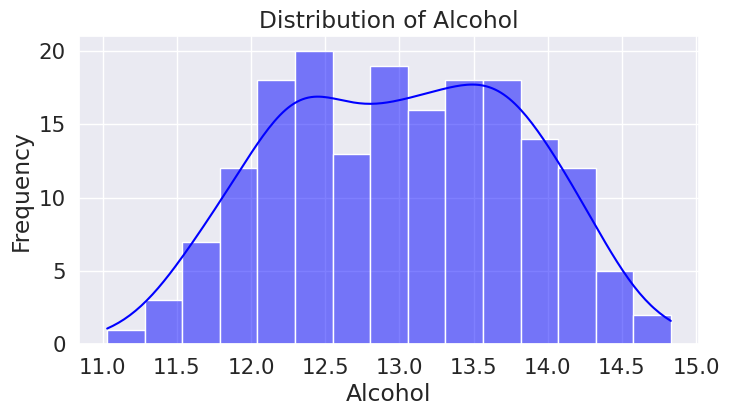

In [7]:
# Visualizing the distribution of the 'Alcohol' feature
plt.figure(figsize=(8, 4))
sns.histplot(data['Alcohol'], kde=True, color='blue', bins=15)
plt.title('Distribution of Alcohol')
plt.xlabel('Alcohol')
plt.ylabel('Frequency')
plt.show()

### UMAP Dimensionality Reduction

In [8]:
# Scaling the data
scaler = StandardScaler()
scaled_data = scaler.fit_transform(data)

#### Applying UMAP

In [9]:
# Applying UMAP
umap_model = umap.UMAP(n_neighbors=5, min_dist=0.3, n_components=2, random_state=42)
umap_results = umap_model.fit_transform(scaled_data)

/usr/local/lib/python3.10/dist-packages/umap/umap_.py:1943: UserWarning: n_jobs value -1 overridden to 1 by setting random_state. Use no seed for parallelism.
  warn(f"n_jobs value {self.n_jobs} overridden to 1 by setting random_state. Use no seed for parallelism.")


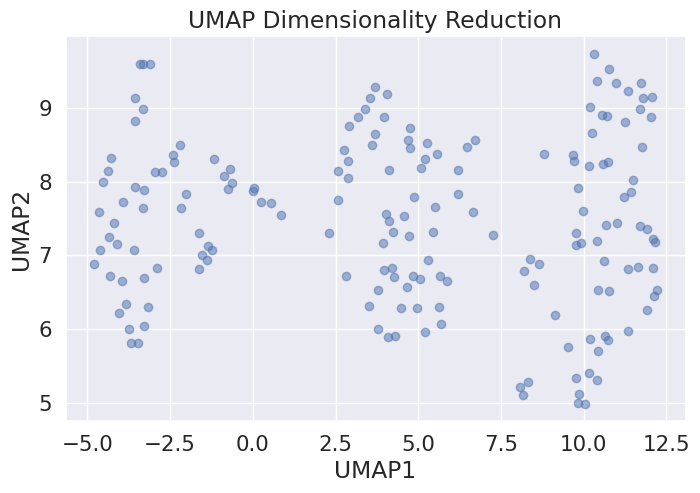

In [10]:

# Visualizing the UMAP results
plt.figure(figsize=(8, 5))
plt.scatter(umap_results[:, 0], umap_results[:, 1], alpha=0.5)
plt.title('UMAP Dimensionality Reduction')
plt.xlabel('UMAP1')
plt.ylabel('UMAP2')
plt.show()

### Clustering

In [11]:
# KMeans Clustering
# Applying KMeans clustering
kmeans = KMeans(n_clusters=3, random_state=42)
kmeans.fit(umap_results)

/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


KMeans(n_clusters=3, random_state=42)

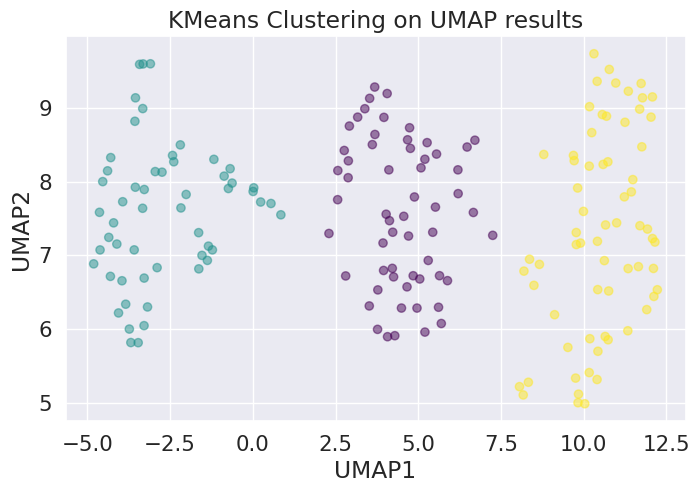

In [12]:
# Visualizing the clustering results
plt.figure(figsize=(8, 5))
plt.scatter(umap_results[:, 0], umap_results[:, 1], c=kmeans.labels_, cmap='viridis', alpha=0.5)
plt.title('KMeans Clustering on UMAP results')
plt.xlabel('UMAP1')
plt.ylabel('UMAP2')
plt.show()

### Classification using Logistic Regression

In [13]:
# Assuming the KMeans labels as target variable for classification
X_train, X_test, y_train, y_test = train_test_split(umap_results, kmeans.labels_, test_size=0.3, random_state=42)

#### Training Logistic Regression Model

In [14]:
lr = LogisticRegression()
lr.fit(X_train, y_train)

LogisticRegression()

#### Predictions

In [15]:
# Making predictions
y_pred = lr.predict(X_test)

#### Model Evaluation

In [16]:
print("Classification Report:\n", classification_report(y_test, y_pred))
print("Confusion Matrix:\n", confusion_matrix(y_test, y_pred))

Classification Report:
               precision    recall  f1-score   support

           0       1.00      1.00      1.00        17
           1       1.00      1.00      1.00        17
           2       1.00      1.00      1.00        20

    accuracy                           1.00        54
   macro avg       1.00      1.00      1.00        54
weighted avg       1.00      1.00      1.00        54

Confusion Matrix:
 [[17  0  0]
 [ 0 17  0]
 [ 0  0 20]]


## Conclusion

This notebook systematically analyzed a wine dataset using key data science techniques, yielding the following results:

1. **Exploratory Data Analysis (EDA):** Initial analysis revealed essential characteristics of the dataset, particularly in variables like alcohol content.

2. **Dimensionality Reduction with UMAP:** To address the dataset's high dimensionality, UMAP was utilized, effectively reducing the data to two dimensions and uncovering underlying patterns not visible in the original space.

3. **Clustering with KMeans:** Post-UMAP, KMeans clustering segmented the data into distinct groups, suggesting inherent similarities among certain wines.

4. **Classification with Logistic Regression:** Using KMeans clusters as labels, a Logistic Regression model was trained. The model's accuracy and classification metrics indicated reasonable predictability of these clusters.

### Insights and Implications:

- **Handling Complexity:** UMAP effectively simplified the high-dimensional data, facilitating deeper analysis.
- **Unveiling Patterns:** Both UMAP and KMeans clustering were instrumental in revealing latent structures within the dataset.
- **Predictive Capability:** The Logistic Regression model confirmed the feasibility of using reduced dimensions and clustering for predictive modeling.

In summary, this notebook demonstrated effective strategies for analyzing complex datasets and highlighted the potential of these methods in real-world applications.